## Titanic Dataset from Kaggle - Exploratory analysis

### By Gautam Borgohain

First initialize the dependencies, read the data and get the dtructure of the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

In [57]:
df = pd.read_csv('/Users/gautamborgohain/Downloads/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Now we can start asking questions


### What is the distribution of age in the dataset?

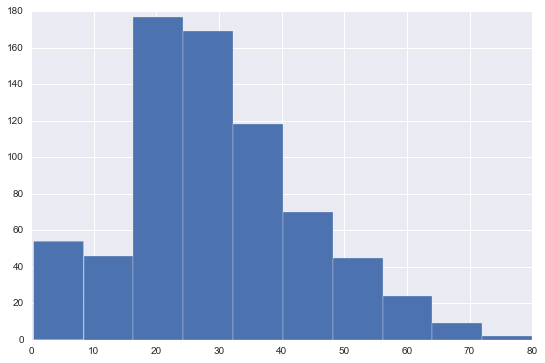

In [64]:
df.Age.hist()

### What is the distribution of Age of people whodid not survive?

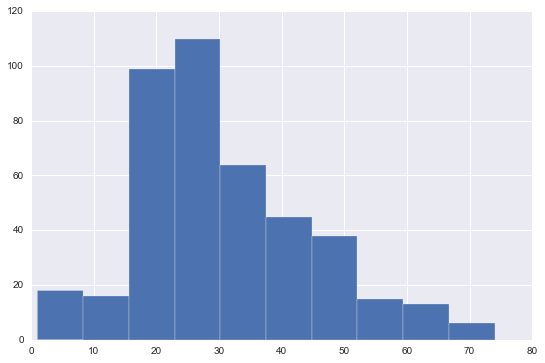

In [65]:
df.query('Survived == 0').Age.hist()

### What is the distribution of Age of people who survived ?

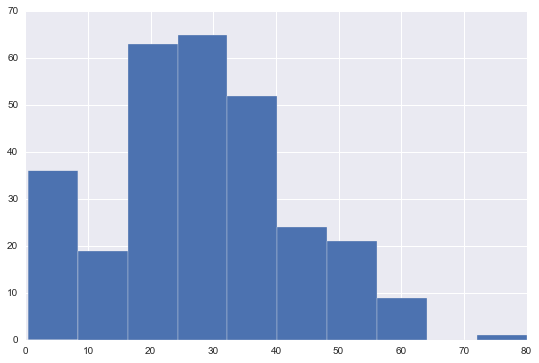

In [66]:
df.query('Survived == 1').Age.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a9e7a90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116ef4978>], dtype=object)

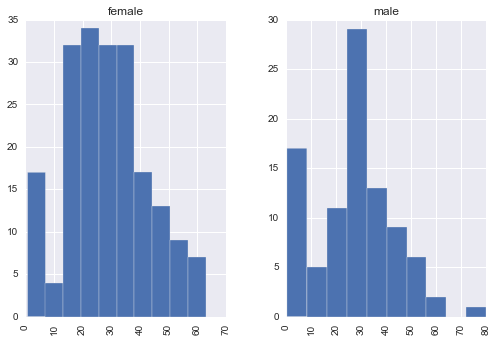

In [131]:
df.query('Survived == 1')[['Age','Sex']].hist(by = 'Sex')

### How many males vs females survived

Survived         0         1
Sex                         
female    0.147541  0.681287
male      0.852459  0.318713


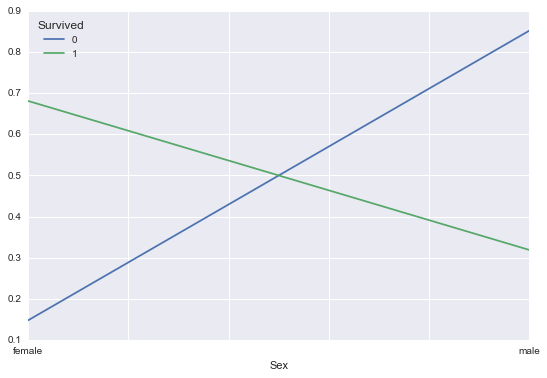

In [62]:
survivaldf = pd.crosstab(df.Sex,df.Survived)
survivaldf[0] = survivaldf[0]/sum(survivaldf[0])
survivaldf[1] = survivaldf[1]/sum(survivaldf[1])
print(survivaldf)
survivaldf.plot()

can be done with the seabon package as well

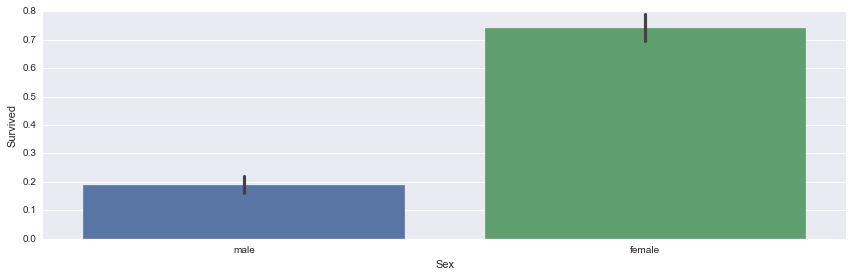

In [63]:
import seaborn as sns
sns.factorplot('Sex', 'Survived', data = df,aspect=3, kind = 'bar')

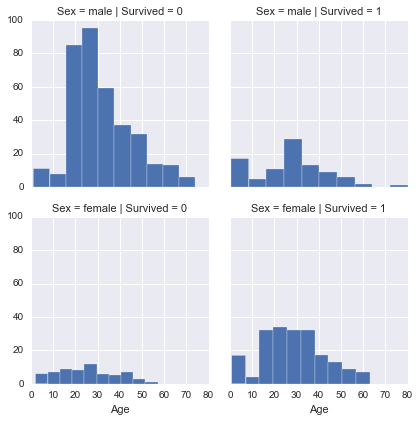

In [120]:
fg = sns.FacetGrid(df,row = 'Sex', col = 'Survived')
fg.map(plt.hist,'Age')

### What is the mean age of male and female who survived in each class?

In [82]:
df.pivot_table(['Age','Fare'], ['Pclass','Survived','Sex'],aggfunc=np.mean)

Age 
 Fare 
 
 
 Pclass 
 Survived 
 Sex 
 
 
 
 
 
 
 1 
 0 
 female 
 25.666667 
 110.604167 
 
 
 male 
 44.581967 
 62.894910 
 
 
 1 
 female 
 34.939024 
 105.978159 
 
 
 male 
 36.248000 
 74.637320 
 
 
 2 
 0 
 female 
 36.000000 
 18.250000 
 
 
 male 
 33.369048 
 19.488965 
 
 
 1 
 female 
 28.080882 
 22.288989 
 
 
 male 
 16.022000 
 21.095100 
 
 
 3 
 0 
 female 
 23.818182 
 19.773093 
 
 
 male 
 27.255814 
 12.204469 
 
 
 1 
 female 
 19.329787 
 12.464526 
 
 
 male 
 22.274211 
 15.579696

### What is the count of people who survived in each class?

In [100]:
df_copy = df.copy()
df_copy['count'] = 1
df_copy.pivot_table(['count'], ['Pclass','Survived','Sex'],aggfunc=np.sum)

count 
 
 
 Pclass 
 Survived 
 Sex 
 
 
 
 
 
 1 
 0 
 female 
 3 
 
 
 male 
 77 
 
 
 1 
 female 
 91 
 
 
 male 
 45 
 
 
 2 
 0 
 female 
 6 
 
 
 male 
 91 
 
 
 1 
 female 
 70 
 
 
 male 
 17 
 
 
 3 
 0 
 female 
 72 
 
 
 male 
 300 
 
 
 1 
 female 
 72 
 
 
 male 
 47

### What is the distribution of males and females by class?

Axes(0.08,0.07;0.87x0.83)
Sex       female      male
Pclass                    
1       0.435185  0.564815
2       0.413043  0.586957
3       0.293279  0.706721


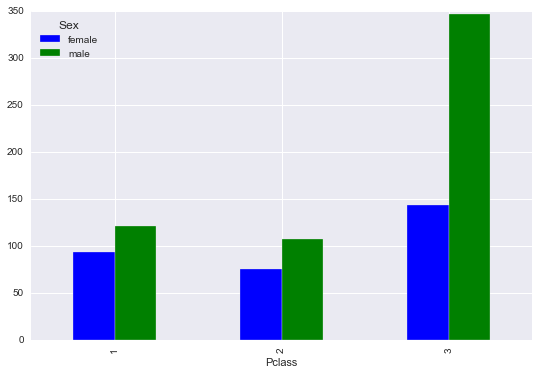

In [104]:
crosstab = pd.crosstab(df.Sex,df.Pclass).transpose()
print(crosstab.plot(kind = 'bar'))

crosstab['Total'] = crosstab.female+crosstab.male
crosstab['female'] = crosstab['female']/crosstab['Total']
crosstab['male'] = crosstab['male']/crosstab['Total']
crosstab.drop('Total', axis = 1, inplace=True)
print(crosstab)

There seems to roughly 60-40 split in class 1 and 2 while there is a 70% male mojority in class 3


### Correlations in the data

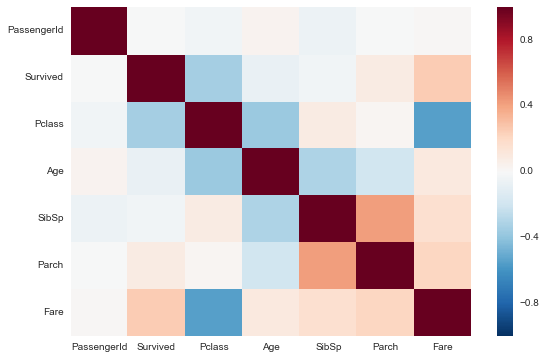

In [116]:
corrdf = df.corr()
sns.heatmap(corrdf)

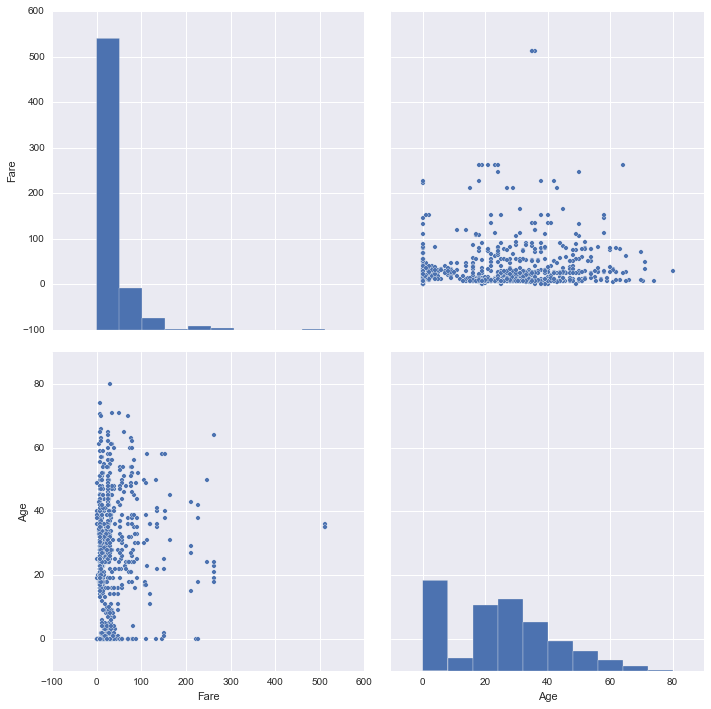

In [117]:
tempdf = df.fillna(0)
sns.pairplot(tempdf[['Fare','Age']], size=5)